# Lab | Cleaning categorical data

Instructions
*    Import the necessary libraries if you are starting a new notebook.
*    Load the continuous and discrete variables into continuous_df and discrete_df variables.
*    Plot a correlation matrix, what can you see?
*    Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
*    What can you see in the plots?
*    Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
*    Have you found outliers? If you have, what should we do with them?
*    Check nan values per column.
*    Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
*    for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
*    Get categorical features.
*    What should we do with the customer id column?

Metadata (from previous file):

    Unnamed: Index
    customer: Customer ID
    state: US State
    customer_lifetime_value: CLV is the client economic value for a company during all their relationship
    response: Response to marketing calls (customer engagement)
    coverage: Customer coverage type
    education: Customer education level
    effective_to_date: Effective to date
    employmentstatus: Customer employment status
    gender: Customer gender
    income: Customer income
    location_code: Customer living zone
    marital_status: Customer marital status
    monthly_premium_auto: Monthly premium
    months_since_last_claim: Last customer claim
    months_since_policy_inception: Policy Inception
    number_of_open_complaints: Open claims
    number_of_policies: Number policies
    policy_type: Policy type
    policy: Policy
    renew_offer_type: Renew
    sales_channel: Sales channel (customer-company first contact)
    total_claim_amount: Claims amount
    vehicle_class: Vehicle class
    vehicle_size: Vehicle size
    vehicle_type: Vehicle type

## Importing libraries

In [1]:
# Importing the Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Importing data

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

## Checking data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Change headers names.

In [6]:
data.columns =data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Checking for null values

In [7]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


## Changing effective to date column to datetime format.

In [8]:
data['effective_to_date'] = pd.to_datetime(data.effective_to_date)
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Checking the numerical values

In [9]:
numericals = data.select_dtypes([np.number, np.datetime64])
numericals.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

## Checking the categorical values

In [11]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Filter function (Continuous or Discrete)

In [22]:
def discrete_continuous (df):
    discrete_df = df.select_dtypes(['int64'])
    continuous_df = df.select_dtypes(['float64', 'datetime64'])
    
    return discrete_df, continuous_df

In [23]:
# Applying the function to the df
discrete_continuous(data)

(      income  monthly_premium_auto  months_since_last_claim  \
 0      56274                    69                       32   
 1          0                    94                       13   
 2      48767                   108                       18   
 3          0                   106                       18   
 4      43836                    73                       12   
 ...      ...                   ...                      ...   
 9129   71941                    73                       18   
 9130   21604                    79                       14   
 9131       0                    85                        9   
 9132   21941                    96                       34   
 9133       0                    77                        3   
 
       months_since_policy_inception  number_of_open_complaints  \
 0                                 5                          0   
 1                                42                          0   
 2                           

In [21]:
discrete_df, continuous_df = discrete_continuous(data)

In [24]:
# Checking the results
discrete_df

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [25]:
# Checking the results
continuous_df

,customer_lifetime_value,effective_to_date,total_claim_amount
0,2763.519279,2011-02-24,384.811147
1,6979.535903,2011-01-31,1131.464935
2,12887.431650,2011-02-19,566.472247
3,7645.861827,2011-01-20,529.881344
4,2813.692575,2011-02-03,138.130879
...,...,...,...
9129,23405.987980,2011-02-10,198.234764
9130,3096.511217,2011-02-12,379.200000
9131,8163.890428,2011-02-06,790.784983
9132,7524.442436,2011-02-03,691.200000


## Plotting a correlation matrix

In [26]:
discrete_df.corr()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [27]:
continuous_df.corr()

,customer_lifetime_value,total_claim_amount
customer_lifetime_value,1.000000,0.226451
total_claim_amount,0.226451,1.000000


In [28]:
numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [29]:
def plot_disc (df):
    discrete_df = df.select_dtypes(['int64'])
    
    return discrete_df.hist(layout= (4,2), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020338D76508>,
      dtype=object)

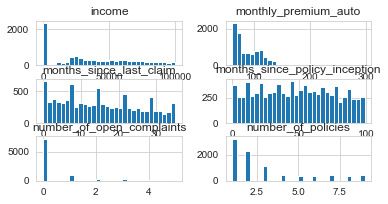

In [30]:
plot_disc(discrete_df)

In [31]:
def plot_cont (df):
    continuous_df = df.select_dtypes(['float64', 'datetime64'])
    
    return continuous_df.hist(layout= (4,2), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203397B68C8>,
      dtype=object)

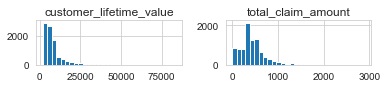

In [32]:
plot_cont(continuous_df)

### We can clearly see by the plots that we have outliers to get rid off.

In [33]:
display(continuous_df)

,customer_lifetime_value,effective_to_date,total_claim_amount
0,2763.519279,2011-02-24,384.811147
1,6979.535903,2011-01-31,1131.464935
2,12887.431650,2011-02-19,566.472247
3,7645.861827,2011-01-20,529.881344
4,2813.692575,2011-02-03,138.130879
...,...,...,...
9129,23405.987980,2011-02-10,198.234764
9130,3096.511217,2011-02-12,379.200000
9131,8163.890428,2011-02-06,790.784983
9132,7524.442436,2011-02-03,691.200000


## Defining the limits

In [34]:
display(numericals)

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,0,3,691.200000


In [35]:
numericals = numericals.drop(['effective_to_date'], axis=1)

In [38]:
# Exploring customer_lifetime_value's limits
iqr1 = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit1 = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr1
print("The upper wisker is at: %4.2f" % upper_limit1)
outliers1 = data[data['customer_lifetime_value'] > upper_limit1].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers1))

The upper wisker is at: 16414.04
The number of points outise the upper wisker is:  817


In [39]:
# Exploring 'income' limits
iqr2 = np.percentile(data['income'],75) - np.percentile(data['income'],25)
upper_limit2 = np.percentile(data['income'],75) + 1.5*iqr2
print("The upper wisker is at: %4.2f" % upper_limit2)
outliers2 = data[data['income'] > upper_limit2].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers2))

The upper wisker is at: 155800.00
The number of points outise the upper wisker is:  0


In [40]:
# Exploring customer_lifetime_value's limits
iqr3 = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit3 = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr3
print("The upper wisker is at: %4.2f" % upper_limit3)
outliers3 = data[data['monthly_premium_auto'] > upper_limit3].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers3))

The upper wisker is at: 170.50
The number of points outise the upper wisker is:  430


In [41]:
# Exploring customer_lifetime_value's limits
iqr4 = np.percentile(data['months_since_last_claim'],75) - np.percentile(data['months_since_last_claim'],25)
upper_limit4 = np.percentile(data['months_since_last_claim'],75) + 1.5*iqr4
print("The upper wisker is at: %4.2f" % upper_limit4)
outliers4 = data[data['months_since_last_claim'] > upper_limit4].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers4))

The upper wisker is at: 48.50
The number of points outise the upper wisker is:  0


In [42]:
# Exploring customer_lifetime_value's limits
iqr5 = np.percentile(data['months_since_policy_inception'],75) - np.percentile(data['months_since_policy_inception'],25)
upper_limit5 = np.percentile(data['months_since_policy_inception'],75) + 1.5*iqr5
print("The upper wisker is at: %4.2f" % upper_limit)
outliers5 = data[data['months_since_policy_inception'] > upper_limit5].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers5))

The upper wisker is at: 16414.04
The number of points outise the upper wisker is:  0


In [43]:
# Exploring customer_lifetime_value's limits
iqr6 = np.percentile(data['number_of_open_complaints'],75) - np.percentile(data['number_of_open_complaints'],25)
upper_limit6 = np.percentile(data['number_of_open_complaints'],75) + 1.5*iqr6
print("The upper wisker is at: %4.2f" % upper_limit6)
outliers6 = data[data['number_of_open_complaints'] > upper_limit6].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers6))

The upper wisker is at: 0.00
The number of points outise the upper wisker is:  1882


In [44]:
# Exploring customer_lifetime_value's limits
iqr7 = np.percentile(data['number_of_policies'],75) - np.percentile(data['number_of_policies'],25)
upper_limit7 = np.percentile(data['number_of_policies'],75) + 1.5*iqr7
print("The upper wisker is at: %4.2f" % upper_limit7)
outliers7 = data[data['number_of_policies'] > upper_limit7].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers7))

The upper wisker is at: 8.50
The number of points outise the upper wisker is:  416


In [45]:
# Exploring customer_lifetime_value's limits
iqr8 = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25)
upper_limit8 = np.percentile(data['total_claim_amount'],75) + 1.5*iqr8
print("The upper wisker is at: %4.2f" % upper_limit8)
outliers8 = data[data['total_claim_amount'] > upper_limit8].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers8))

The upper wisker is at: 960.40
The number of points outise the upper wisker is:  453


In [46]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


## Filtering outliers

Let's explore two different ways to drop outliers.

### Filter function. filter(lambda_function, column)

In [47]:
points = list(filter(lambda x: x < upper_limit1, data['customer_lifetime_value']))
len(points)

8317

In [48]:
points = list(filter(lambda x: x < upper_limit2, data['income']))
len(points)

9134

In [49]:
points = list(filter(lambda x: x < upper_limit3, data['monthly_premium_auto']))
len(points)

8704

In [50]:
points = list(filter(lambda x: x < upper_limit4, data['months_since_last_claim']))
len(points)

9134

In [51]:
points = list(filter(lambda x: x < upper_limit5, data['months_since_policy_inception']))
len(points)

9134

In [52]:
points = list(filter(lambda x: x < upper_limit6, data['number_of_open_complaints']))
len(points)

0

In [53]:
points = list(filter(lambda x: x < upper_limit7, data['number_of_policies']))
len(points)

8718

In [54]:
points = list(filter(lambda x: x < upper_limit8, data['total_claim_amount']))
len(points)

8681

There is no perfect approach when dealing with outiliers, everything will depend of the objectives and goals of the analysis. In this case we have a large dataset and looks like we can simply remove the problematic values.